In [394]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor



In [395]:
test_cols = ['3P', '2P', 'FT', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
             '3PAr', 'FTr', 'TRB%', 'STL%', 'BLK%',
             'USG%', 'OWS', 'DWS', 'VORP', 'Year_x']

In [474]:
sns.set_style('whitegrid')
sns.set_palette('flare')

In [397]:
df = pd.read_csv('Full Dataset.csv', index_col=0)
df_copy = df.copy()
df.drop(columns=['All_Star'], inplace=True)
df.shape

(18264, 55)

In [450]:
df['Got_MVP_Votes'] = pd.Categorical(np.where(df['MVP_Share'] != 0, 1, 0))

# df.Got_MVP_Votes.head()

In [451]:
# Unbalanced
df.Got_MVP_Votes.value_counts() / len(df)

0    0.963152
1    0.036848
Name: Got_MVP_Votes, dtype: float64

In [452]:
# df[['Pos', 'Age', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P',
#        '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
#        'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
#        '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
#        'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
#        'MVP_Share']]

In [453]:

X = df.drop(columns=['Player', 'Tm', 'GS', 'MVP_Pts Won', 'MVP_Share', 'MVP_Pts Max', 'MVP_Rank', 'MVP_First',
                     'Got_MVP_Votes'])

X = X[test_cols]

y = df[['MVP_Share', 'Got_MVP_Votes', 'Year_x']]



In [454]:
year = 2022

X_train_reg = df.loc[(df['Got_MVP_Votes'] == 1) & (df.Year_x != year), test_cols + ['Got_MVP_Votes']]
y_train_reg = df.loc[(df.Got_MVP_Votes == 1) & (df.Year_x != year), 'MVP_Share']

y_test_reg = df.loc[(df.Got_MVP_Votes == 1) & (df.Year_x == year), 'MVP_Share']

X_train_reg


,3P,2P,FT,TRB,AST,STL,BLK,TOV,PF,PTS,...,FTr,TRB%,STL%,BLK%,USG%,OWS,DWS,VORP,Year_x,Got_MVP_Votes
0,0.0,10.2,4.4,10.8,4.5,1.0,3.4,3.6,2.6,24.8,...,0.344,15.4,1.2,4.6,24.1,9.5,5.3,7.3,1980,1
3,0.1,4.7,4.5,2.5,8.4,1.3,0.1,3.0,2.7,14.1,...,0.548,3.8,1.7,0.2,17.0,5.9,2.9,2.3,1980,1
17,0.7,7.7,3.7,10.4,4.5,1.7,0.6,3.2,3.4,21.3,...,0.246,16.0,2.3,1.0,25.3,5.6,5.6,4.8,1980,1
84,0.1,10.7,5.4,7.4,4.6,2.2,1.8,3.6,2.7,26.9,...,0.331,10.9,2.8,2.7,30.3,7.3,5.2,6.8,1980,1
97,0.4,12.7,6.5,5.2,2.6,1.4,1.0,3.3,2.7,33.1,...,0.306,7.3,1.6,1.4,31.7,9.3,1.3,4.4,1980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17514,1.5,4.8,2.4,4.5,8.9,1.4,0.3,2.2,2.4,16.4,...,0.206,8.0,2.2,0.8,22.6,6.5,2.7,3.6,2021,1
17539,2.3,6.2,4.9,10.2,6.0,0.9,0.3,3.4,3.2,24.1,...,0.325,14.7,1.2,0.6,29.3,3.4,4.3,3.9,2021,1
17557,1.0,4.7,2.2,2.6,4.2,1.0,0.4,1.6,1.1,14.7,...,0.208,5.5,1.9,1.4,25.8,1.6,1.6,1.3,2021,1
17575,0.1,5.6,3.0,7.2,6.9,1.6,0.6,3.0,2.9,14.3,...,0.492,12.2,2.4,1.7,20.2,2.7,3.3,2.3,2021,1


In [455]:



X_train = X[X['Year_x'] != year].copy()
X_test = X[X['Year_x'] == year].copy()
y_train = y[y['Year_x'] != year].copy()
y_test = y[y['Year_x'] == year].copy()
for i in [X_train, X_test, y_train, y_test]:
    i.drop(columns=['Year_x'], inplace=True)





In [456]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train['Got_MVP_Votes'])

RandomForestClassifier()

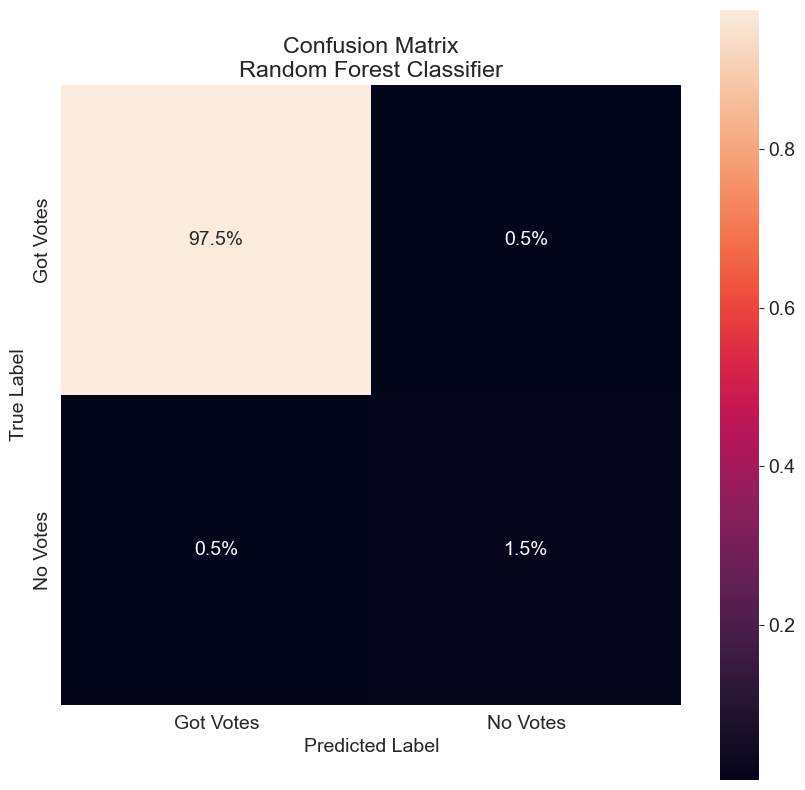

In [457]:
# metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test['Got_MVP_Votes'],rf_clf.predict(X_test))).plot()
cf_matrix =metrics.confusion_matrix(y_test['Got_MVP_Votes'], rf_clf.predict(X_test),normalize='all')
plt.figure(figsize=(10,10))
# sns.heatmap(cf_matrix/np.sum(cf_matrix),annot=True,fmt='.1%')
plt.title('Confusion Matrix\nRandom Forest Classifier')

sns.heatmap(cf_matrix,annot=True,fmt='.1%',xticklabels=['Got Votes', 'No Votes'],yticklabels=['Got Votes','No Votes'],square=True)

# plt.xticks(['Got Votes', 'No Votes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('RFC Confusion Matrix.png',dpi=400)

In [458]:
metrics.recall_score(y_test['Got_MVP_Votes'],rf_clf.predict(X_test))

0.75

In [459]:
metrics.precision_score(y_test['Got_MVP_Votes'],rf_clf.predict(X_test))

0.75

In [460]:
rf_clf.score(X_test, y_test['Got_MVP_Votes'])

0.9900826446280991

In [461]:
X_test['got_votes_pred'] = rf_clf.predict(X_test)


In [462]:
X_test.columns

Index(['3P', '2P', 'FT', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER',
       'TS%', '3PAr', 'FTr', 'TRB%', 'STL%', 'BLK%', 'USG%', 'OWS', 'DWS',
       'VORP', 'got_votes_pred'],
      dtype='object')

In [463]:
X_test_reg = X_test.loc[X_test.got_votes_pred == 1, X_test.drop(columns=['got_votes_pred']).columns]

df.iloc[X_test_reg.index]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DBPM,BPM,VORP,Year_x,MVP_Rank,MVP_First,MVP_Pts Won,MVP_Pts Max,MVP_Share,Got_MVP_Votes
17670,Giannis Antetokounmpo,4,27,MIL,67,67,32.9,10.3,18.6,0.553,...,3.5,11.2,7.4,2022,2.0,9.0,595.0,1000.0,0.595,1
17792,DeMar DeRozan,4,32,CHI,76,76,36.1,10.2,20.2,0.504,...,-0.9,2.5,3.1,2022,9.0,0.0,1.0,1000.0,0.001,1
17799,Luka Dončić,1,22,DAL,65,65,35.4,9.9,21.6,0.457,...,1.8,8.2,5.9,2022,4.0,0.0,146.0,1000.0,0.146,1
17812,Kevin Durant,4,33,BRK,55,55,37.2,10.5,20.3,0.518,...,0.7,7.2,4.8,2022,9.0,0.0,1.0,1000.0,0.001,1
17820,Joel Embiid,5,27,PHI,68,68,33.8,9.8,19.6,0.499,...,2.0,9.2,6.5,2022,1.0,26.0,706.0,1000.0,0.706,1
17932,LeBron James,4,37,LAL,56,56,37.2,11.4,21.8,0.524,...,0.8,7.7,5.1,2022,9.0,0.0,1.0,1000.0,0.001,1
17948,Nikola Jokić,5,26,DEN,74,74,33.5,10.3,17.7,0.583,...,4.5,13.7,9.8,2022,0.0,65.0,875.0,1000.0,0.875,1
18048,Ja Morant,1,22,MEM,57,57,33.1,10.2,20.6,0.493,...,-0.1,6.1,3.9,2022,6.0,0.0,10.0,1000.0,0.010,1
18058,Dejounte Murray,1,25,SAS,68,68,34.8,8.4,18.3,0.462,...,1.7,5.4,4.4,2022,0.0,0.0,0.0,0.0,0.000,0
18184,Jayson Tatum,3,23,BOS,76,76,35.9,9.3,20.6,0.453,...,0.6,4.9,4.8,2022,5.0,0.0,43.0,1000.0,0.043,1


In [464]:
X_train_reg.drop(columns=['Year_x', 'Got_MVP_Votes'], inplace=True)

In [465]:
rf = RandomForestRegressor()
rf.fit(X_train_reg, y_train_reg)


RandomForestRegressor()

In [466]:
y_test_reg = df.loc[X_test_reg.index, ['MVP_Share']]

In [467]:
# Returns the coefficient of determination of the prediction. (R2)
rf.score(X_test_reg, y_test_reg)

0.8444684965363762

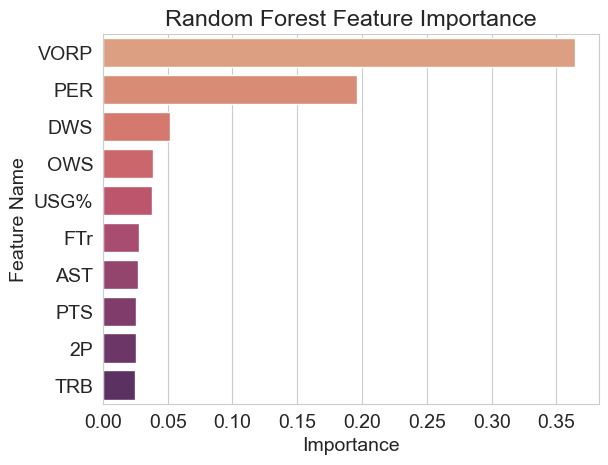

In [477]:
sns.set_palette('flare')
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).reset_index()
feature_importances.columns = ['Feature Name', 'Importance']
sns.barplot(x='Importance', y='Feature Name', data=feature_importances.sort_values('Importance', ascending=False)[:10],palette=sns.color_palette('flare',10))

plt.title('Random Forest Feature Importance')
plt.show()

In [469]:

pred = rf.predict(X_test_reg)

In [503]:
X_test_reg = df.loc[X_test_reg.index, :]
X_test_reg['Predicted Vote Share'] = pred
X_test_reg['Actual Vote Share'] = y_test_reg


In [471]:
np.sqrt(metrics.mean_squared_error(X_test_reg['Actual Vote Share'],X_test_reg['Predicted Vote Share']))

0.12314948159317067

In [472]:
X_test_reg

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,VORP,Year_x,MVP_Rank,MVP_First,MVP_Pts Won,MVP_Pts Max,MVP_Share,Got_MVP_Votes,Predicted Vote Share,Actual Vote Share
17670,Giannis Antetokounmpo,4,27,MIL,67,67,32.9,10.3,18.6,0.553,...,7.4,2022,2.0,9.0,595.0,1000.0,0.595,1,0.63524,0.595
17792,DeMar DeRozan,4,32,CHI,76,76,36.1,10.2,20.2,0.504,...,3.1,2022,9.0,0.0,1.0,1000.0,0.001,1,0.03514,0.001
17799,Luka Dončić,1,22,DAL,65,65,35.4,9.9,21.6,0.457,...,5.9,2022,4.0,0.0,146.0,1000.0,0.146,1,0.35139,0.146
17812,Kevin Durant,4,33,BRK,55,55,37.2,10.5,20.3,0.518,...,4.8,2022,9.0,0.0,1.0,1000.0,0.001,1,0.08363,0.001
17820,Joel Embiid,5,27,PHI,68,68,33.8,9.8,19.6,0.499,...,6.5,2022,1.0,26.0,706.0,1000.0,0.706,1,0.47897,0.706
17932,LeBron James,4,37,LAL,56,56,37.2,11.4,21.8,0.524,...,5.1,2022,9.0,0.0,1.0,1000.0,0.001,1,0.14752,0.001
17948,Nikola Jokić,5,26,DEN,74,74,33.5,10.3,17.7,0.583,...,9.8,2022,0.0,65.0,875.0,1000.0,0.875,1,0.78885,0.875
18048,Ja Morant,1,22,MEM,57,57,33.1,10.2,20.6,0.493,...,3.9,2022,6.0,0.0,10.0,1000.0,0.010,1,0.07862,0.010
18058,Dejounte Murray,1,25,SAS,68,68,34.8,8.4,18.3,0.462,...,4.4,2022,0.0,0.0,0.0,0.0,0.000,0,0.08555,0.000
18184,Jayson Tatum,3,23,BOS,76,76,35.9,9.3,20.6,0.453,...,4.8,2022,5.0,0.0,43.0,1000.0,0.043,1,0.12317,0.043


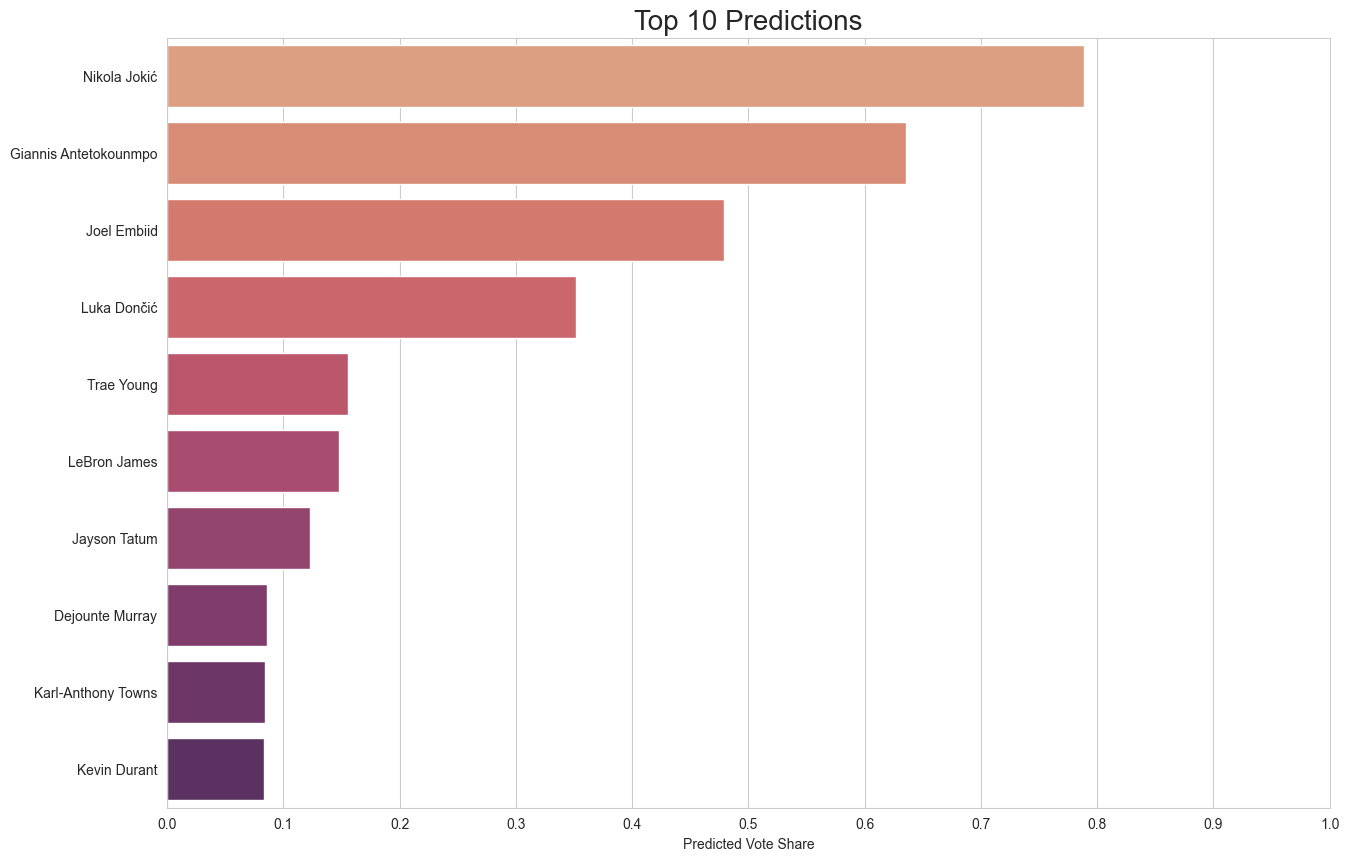

In [499]:
plt.rcdefaults()
sns.set_style('whitegrid')


plt.figure(figsize=(15,10))
sns.barplot(x='Predicted Vote Share', y='Player',
            data=X_test_reg.sort_values('Predicted Vote Share', ascending=False)[:10],palette=sns.color_palette('flare',10))
plt.xticks([i / 10 for i in range(0, 11, 1)])

plt.ylabel('')
plt.title('Top 10 Predictions',fontdict={'size':20,})

plt.savefig('Top 10 Predictions.png',dpi=400)


plt.show()

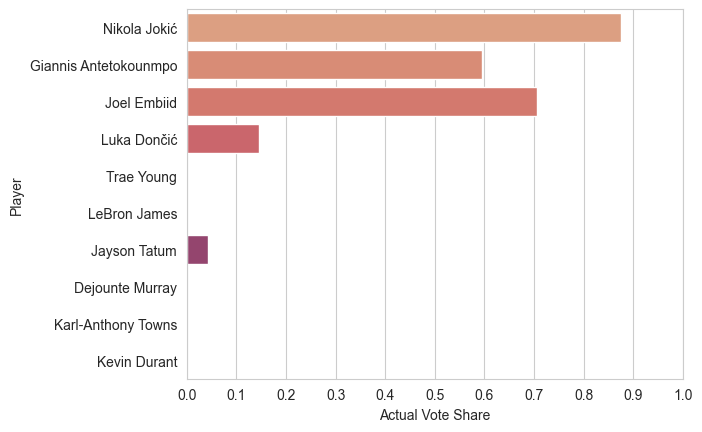

In [486]:
sns.barplot(x='Actual Vote Share', y='Player',
            data=X_test_reg.sort_values('Predicted Vote Share', ascending=False)[:10],palette=sns.color_palette('flare',10))
plt.xticks([i / 10 for i in range(0, 11, 1)])
plt.show()

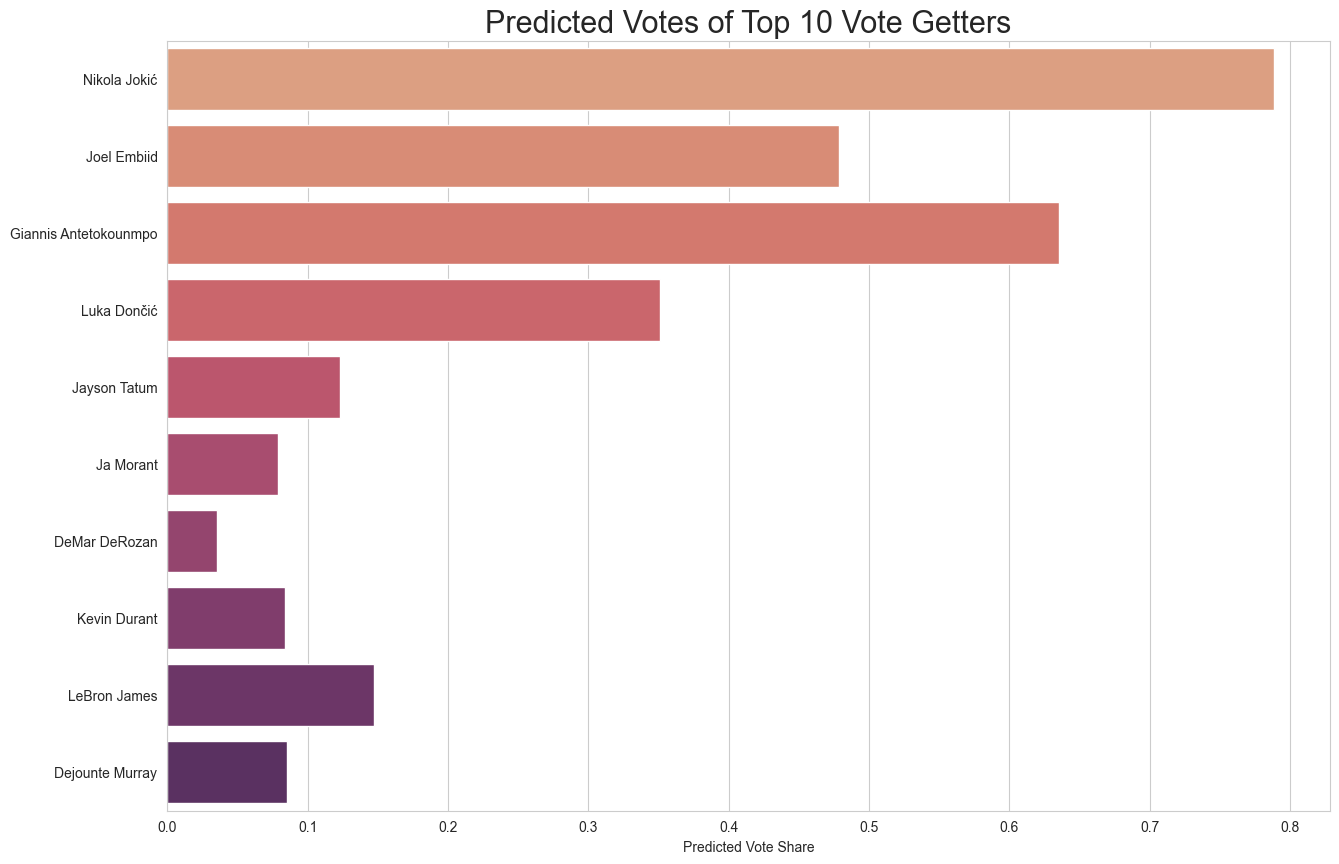

In [496]:
plt.figure(figsize=(15,10))

sns.barplot(x='Predicted Vote Share', y='Player',
            data=X_test_reg.sort_values('Actual Vote Share', ascending=False)[:10],palette=sns.color_palette('flare',10))

plt.ylabel('')
plt.title('Predicted Votes of Top 10 Vote Getters',fontdict={'size':22,})

plt.savefig('Predicted Votes of Top 10 Vote Getters.png',dpi=400)

plt.show()


In [424]:
df.shape

(18264, 56)

In [425]:
corr_df = df[test_cols + ['MVP_Share']].corr().MVP_Share.reset_index()
# corr_df.drop(['3PAr','Year_x','MVP_Share'],inplace=True)
corr_df.columns = ['Statistic', 'Correlation w/ MVP Share']
corr_df = corr_df[~corr_df.Statistic.isin(['3PAr', 'Year_x', 'MVP_Share'])]

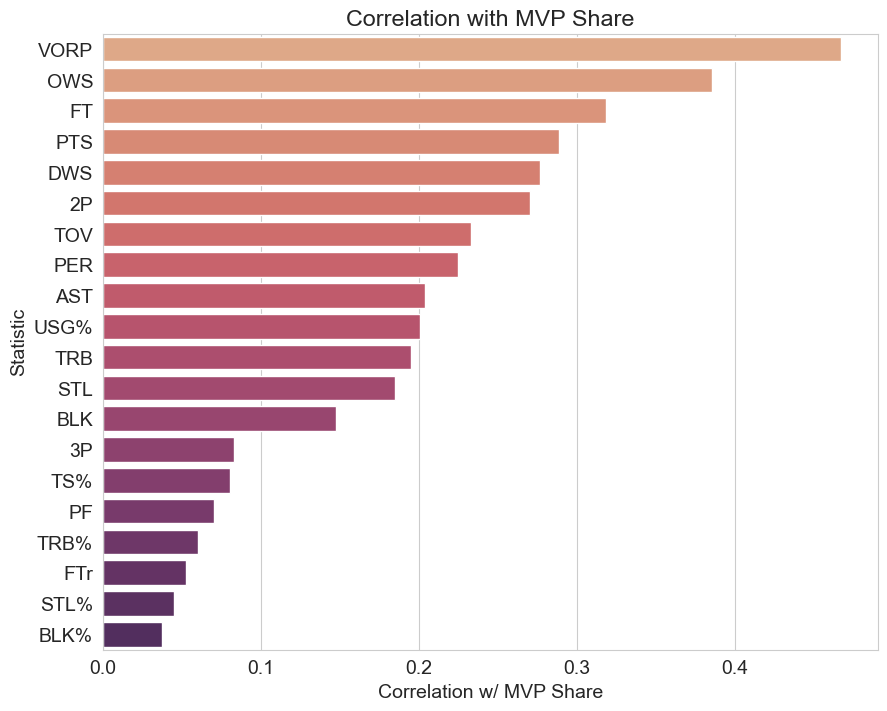

In [426]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8), )
sns.barplot(x='Correlation w/ MVP Share', y='Statistic',
            data=corr_df.sort_values('Correlation w/ MVP Share', ascending=False),
            palette=sns.color_palette("flare", len(corr_df)))
plt.title('Correlation with MVP Share')
plt.savefig(f'plots/correlation_MVP_Share.png', dpi=400)

In [427]:
test_cols2 = ['Pos', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
              '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
              'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
              '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
              'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'MVP_Share']

In [428]:
corr_df = df[test_cols2].corr().MVP_Share.reset_index()
# corr_df.drop(['3PAr','Year_x','MVP_Share'],inplace=True)
corr_df.columns = ['Statistic', 'Correlation w/ MVP Share']
corr_df = corr_df[~corr_df.Statistic.isin(['MVP_Share'])]

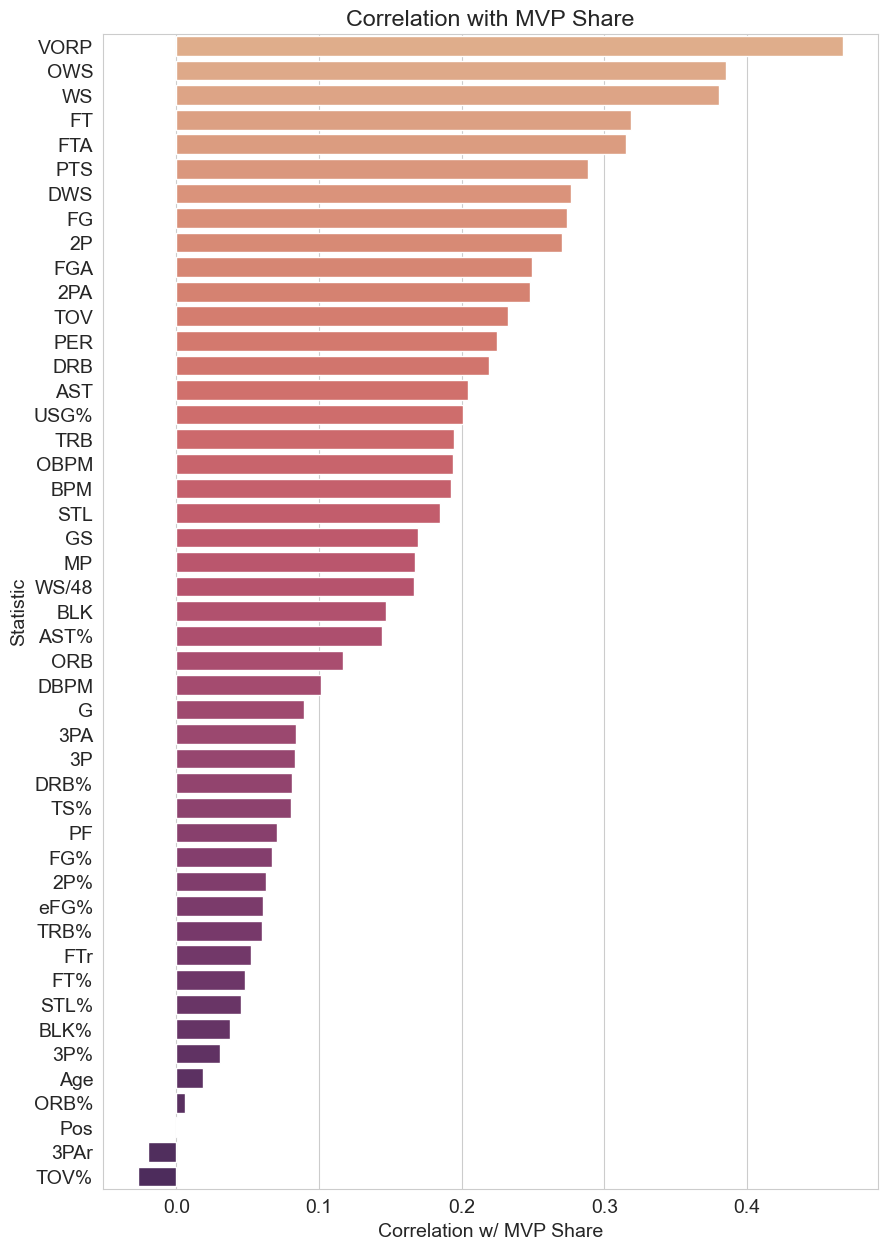

In [429]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 15), )
sns.barplot(x='Correlation w/ MVP Share', y='Statistic',
            data=corr_df.sort_values('Correlation w/ MVP Share', ascending=False),
            palette=sns.color_palette("flare", len(corr_df)))
plt.title('Correlation with MVP Share')
plt.savefig(f'plots/correlation_All_Features_MVP_Share.png', dpi=400)

In [430]:
def check_corr(df, threshold):
    corr_columns = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                corr_columns.add(colname)
    return list(corr_columns)





In [431]:
for i in check_corr(
        df.drop(columns=['3PA', 'TRB%', 'MVP_Pts Max', 'TOV', 'WS', 'MP', 'TS%', '2P%', 'MVP_Share', 'FGA', 'FTA',
                         'AST%', 'eFG%', 'BPM', '2PA', 'WS/48', 'FT', 'PTS', 'FG', 'TRB', 'OBPM', '2P', ]), .6):
    print(f"'{i}', ", end='')

'DRB', 'BLK', 'DRB%', 'PF', 'BLK%', 'MVP_Pts Won', 'PER', 'VORP', '3PAr', 'STL', 'DWS', 'OWS', 

In [432]:
check_corr(df.drop(
    columns=['3PA', 'TRB%', 'MVP_Pts Max', 'TOV', 'WS', 'MP', 'TS%', '2P%', 'MVP_Share', 'FGA', 'FTA', 'AST%', 'eFG%',
             'BPM', '2PA', 'WS/48', 'FT', 'PTS', 'FG', 'TRB', 'OBPM', '2P', ]), .6)

['DRB',
 'BLK',
 'DRB%',
 'PF',
 'BLK%',
 'MVP_Pts Won',
 'PER',
 'VORP',
 '3PAr',
 'STL',
 'DWS',
 'OWS']

In [433]:
'TRB', 'OBPM', '2P', 'VORP', 'FT', 'PTS', 'FG',

('TRB', 'OBPM', '2P', 'VORP', 'FT', 'PTS', 'FG')

In [434]:
for i in check_corr(df[test_cols], .6):
    print(f"'{i}', ", end='')

'BLK', 'TRB', 'PF', 'BLK%', 'PER', 'VORP', 'FT', 'PTS', '3PAr', 'STL', 'TOV', 'TS%', 'DWS', 'OWS', 

<AxesSubplot:>

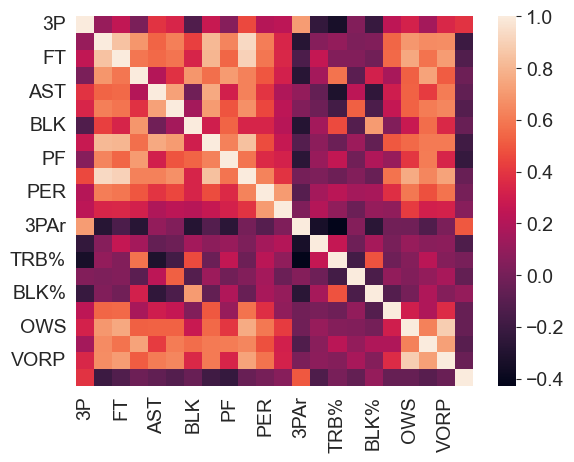

In [435]:
sns.heatmap(df[test_cols].corr())

In [436]:

[i for i in df.columns if 'MVP' not in i]

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'Year_x']

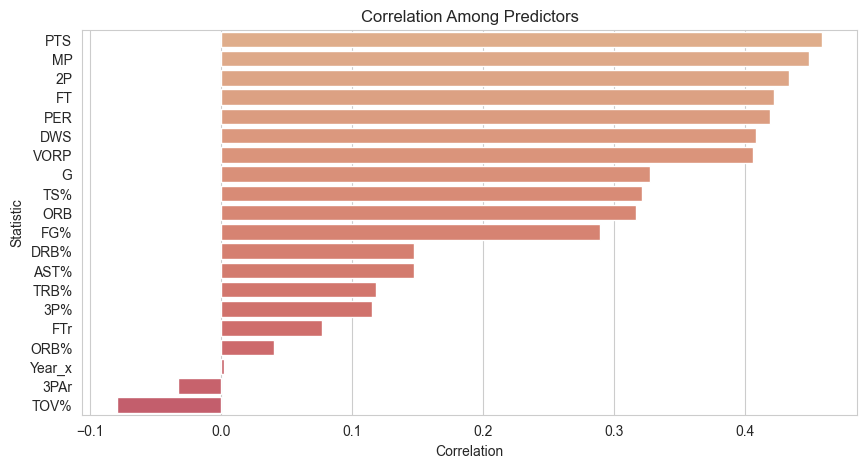

In [437]:
plt.rcdefaults()
sns.set_style('whitegrid')
c = df[[i for i in df.columns if 'MVP' not in i]].corr().mean().reset_index()

c.columns = ['Statistic', 'Correlation']

plt.figure(figsize=(10, 5), )
# plt.tight_layout()
# plt.subplots_adjust(left=0.2)

plt.title('Correlation Among Predictors')
sns.barplot(x='Correlation', y='Statistic',
            data=c.sample(20, random_state=0, ).sort_values('Correlation', ascending=False),
            palette=sns.color_palette("flare", len(c)))
plt.savefig('Corr Among Features.png', dpi=400)

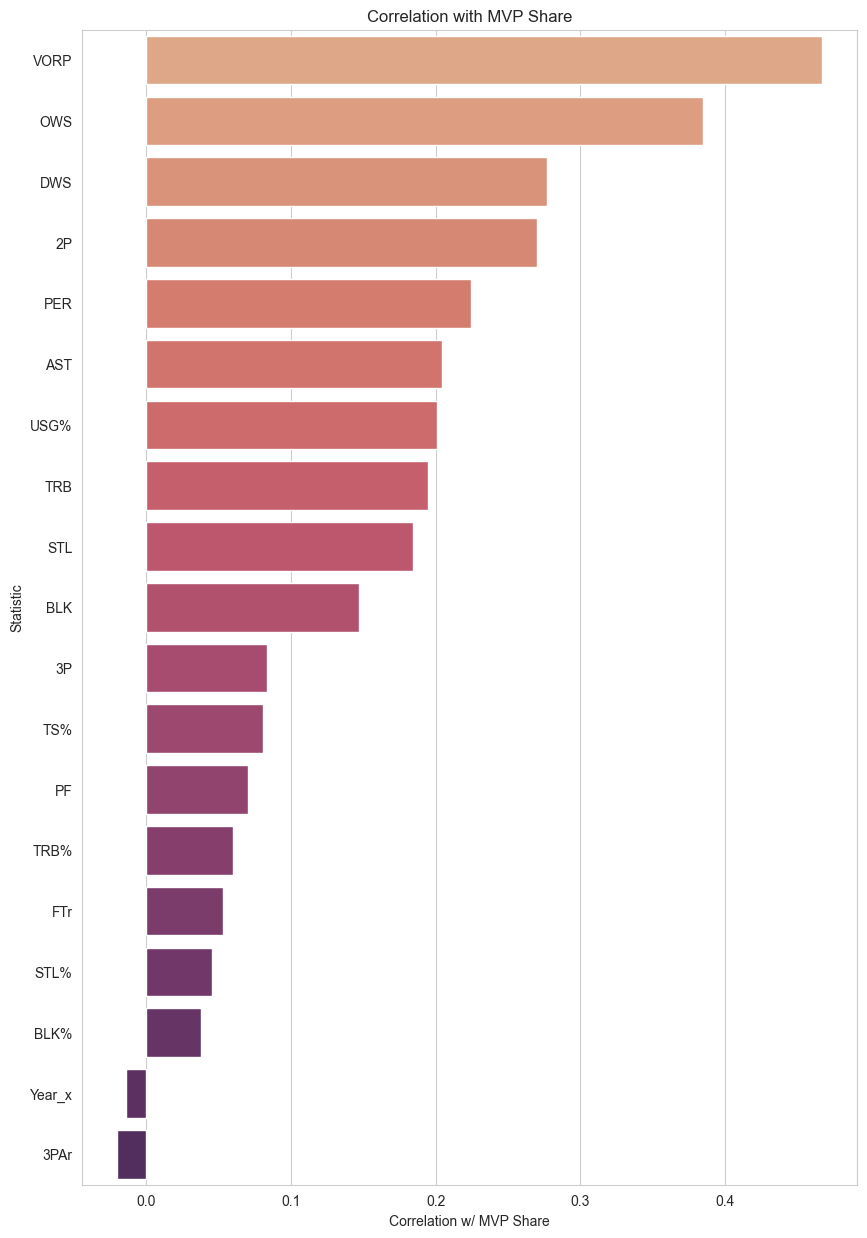

In [438]:
d = df[test_cols].drop(columns=check_corr(df[test_cols], .8))
d['MVP_Share'] = df.MVP_Share
d['VORP'] = df.VORP
corr_df = d.corr().MVP_Share.reset_index()
# corr_df.drop(['3PAr','Year_x','MVP_Share'],inplace=True)
corr_df.columns = ['Statistic', 'Correlation w/ MVP Share']
corr_df = corr_df[~corr_df.Statistic.isin(['MVP_Share'])]
sns.set_style('whitegrid')
plt.figure(figsize=(10, 15), )
sns.barplot(x='Correlation w/ MVP Share', y='Statistic',
            data=corr_df.sort_values('Correlation w/ MVP Share', ascending=False),
            palette=sns.color_palette("flare", len(corr_df)))
plt.title('Correlation with MVP Share')
plt.savefig(f'plots/correlation_All_Features_MVP_Share.png', dpi=400)

In [439]:
# for i in df.columns:
#     if df[i].str.isnumeric().sum() > 0:
#         print(i)
#         break

In [440]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Year_x', 'MVP_Rank', 'MVP_First', 'MVP_Pts Won', 'MVP_Pts Max',
       'MVP_Share', 'Got_MVP_Votes'],
      dtype='object')

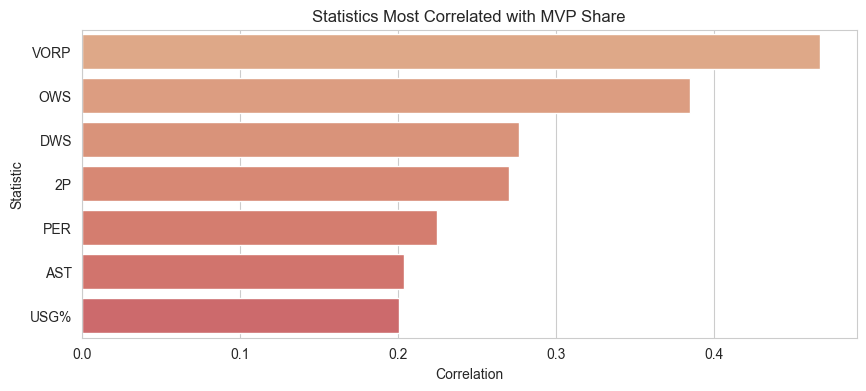

In [441]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4), )

sns.barplot(x='Correlation w/ MVP Share', y='Statistic',
            data=corr_df[corr_df['Correlation w/ MVP Share'] > .2].sort_values('Correlation w/ MVP Share',
                                                                               ascending=False),
            palette=sns.color_palette("flare", len(corr_df)))
plt.xlabel('Correlation')
plt.title('Statistics Most Correlated with MVP Share')
plt.savefig('Correlation with MVP Share.png', dpi=400)

In [442]:
corr_df[corr_df['Correlation w/ MVP Share'] > .2].sort_values('Correlation w/ MVP Share', ascending=False).shape

(7, 2)

In [443]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'Year_x', 'MVP_Rank', 'MVP_First', 'MVP_Pts Won', 'MVP_Pts Max',
       'MVP_Share', 'Got_MVP_Votes'],
      dtype='object')

In [444]:
df_t  = df[[ 'FG', 'FT', 'ORB','DRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PER', 'TS%', 'USG%', 'OWS', 'DWS', 'VORP',]]
for i in df_t.columns:
    print(i,end=', ')

FG, FT, ORB, DRB, AST, STL, BLK, TOV, PTS, PER, TS%, USG%, OWS, DWS, VORP, 

In [445]:
a = df['MVP_Share'] * 100

a = pd.DataFrame([round(i*100,) for i in df.MVP_Share]).reset_index()
a.columns =['Index','Percent']
b = a.Percent.value_counts().reset_index

In [446]:
# sns.set_style('whitegrid')
# plt.figure(figsize=(10, 10), )
# sns.histplot(x='Percent',data=a,bins=25,color=sns.color_palette('mako',25),legend=False,)
#
#
# plt.savefig('MVP Share Histogram.png',dpi=400)
#
# plt.show()


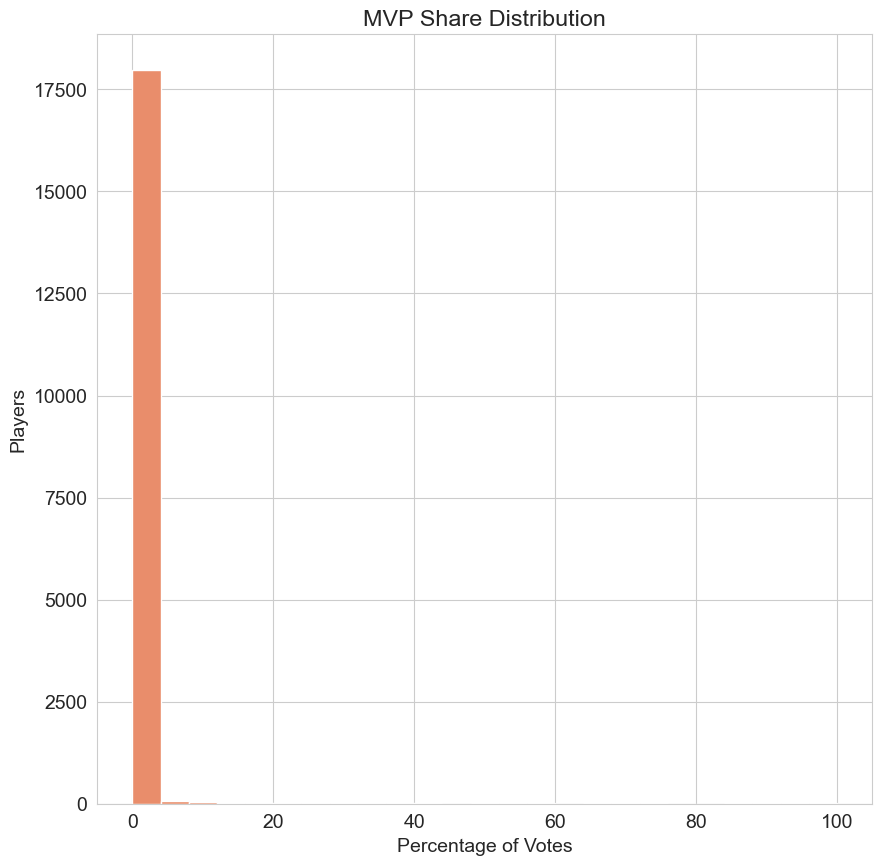

In [447]:

plt.rcParams.update({'font.size': 14})

sns.set_style('whitegrid')

sns.set_palette('flare')
plt.figure(figsize=(10, 10), )
sns.histplot(x='Percent',data=a,bins=25,legend=False,alpha=1)

# plt.xticks([f'{i}%' for i in range(0,101,10)])

plt.xlabel('Percentage of Votes')
plt.ylabel('Players')

plt.title('MVP Share Distribution')

plt.savefig('MVP Share Histogram.png',dpi=400)
#
# plt.show()

<AxesSubplot:xlabel='Year', ylabel='Players'>

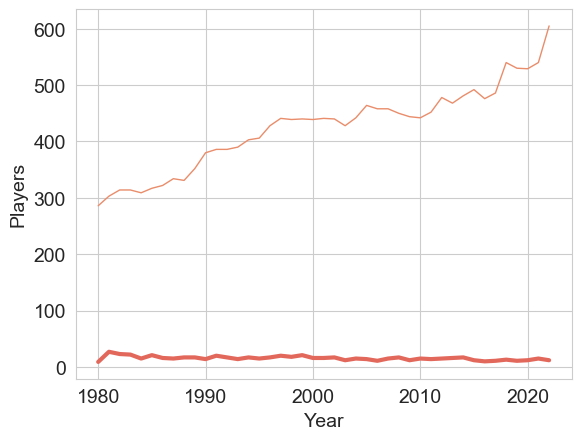

In [448]:
pl = []
vot = []
for i in range(1980,2023):
    pl.append(len(df[df['Year_x'] == i]))
    vot.append(len(df[(df['Year_x'] == i) & (df['MVP_Share'] != 0)] ))

c = pd.DataFrame(columns=['Players','Got Votes'])
c['Players'] = pl
c['Got Votes'] = vot
c['Year'] = list(range(1980,2023))
sns.lineplot(x='Year',y='Players',data=c,linewidth=1)
sns.lineplot(x='Year',y='Got Votes',data=c,linewidth=3)

In [502]:
len(df[df.Year_x >= 2021])/len(df)

0.0626916338151555

In [506]:
df[df['Year_x'] == 1999].sort_values('MVP_Share',ascending=False)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DBPM,BPM,VORP,Year_x,MVP_Rank,MVP_First,MVP_Pts Won,MVP_Pts Max,MVP_Share,Got_MVP_Votes
7071,Karl Malone,4,35,UTA,49,49,37.4,8.0,16.3,0.493,...,1.4,6.7,4.0,1999,1.0,44.0,827.0,1180.0,0.701,1
7109,Alonzo Mourning,5,28,MIA,46,46,38.1,7.0,13.8,0.511,...,2.2,4.7,3.0,1999,2.0,36.0,773.0,1180.0,0.655,1
6951,Tim Duncan,4,22,SAS,50,50,39.3,8.4,16.9,0.495,...,1.8,4.5,3.2,1999,3.0,30.0,740.0,1180.0,0.627,1
7018,Allen Iverson,2,23,PHI,48,48,41.5,9.1,22.0,0.412,...,0.6,5.7,3.9,1999,4.0,5.0,319.0,1180.0,0.270,1
7043,Jason Kidd,1,25,PHO,50,50,41.2,6.2,14.0,0.444,...,1.1,5.5,3.9,1999,5.0,2.0,159.0,1180.0,0.135,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6985,Ed Gray,2,23,ATL,30,3,11.2,1.8,6.1,0.291,...,-1.6,-7.7,-0.5,1999,0.0,0.0,0.0,0.0,0.000,0
6984,Paul Grant,5,25,TOT,6,0,2.2,0.3,1.0,0.333,...,-3.3,-19.6,-0.1,1999,0.0,0.0,0.0,0.0,0.000,0
6983,Horace Grant,4,33,ORL,50,50,33.2,4.0,9.1,0.434,...,1.3,0.7,1.1,1999,0.0,0.0,0.0,0.0,0.000,0
6982,Harvey Grant,4,33,PHI,47,10,17.0,1.3,3.6,0.369,...,0.5,-2.8,-0.2,1999,0.0,0.0,0.0,0.0,0.000,0
